In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/raw/iris.csv")


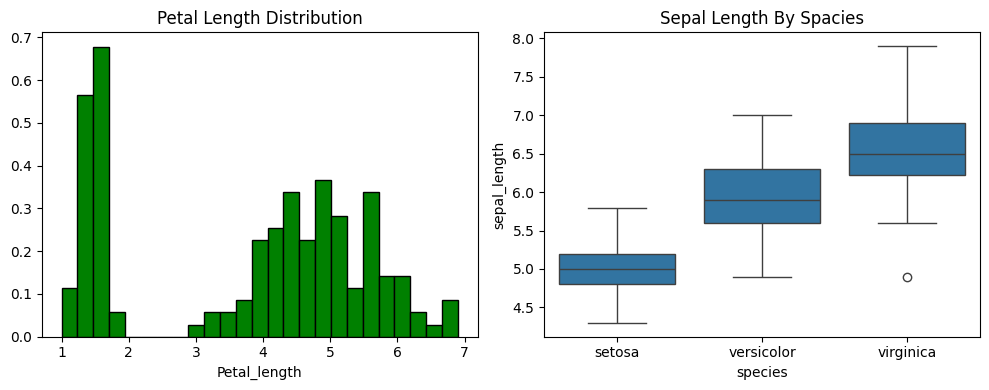

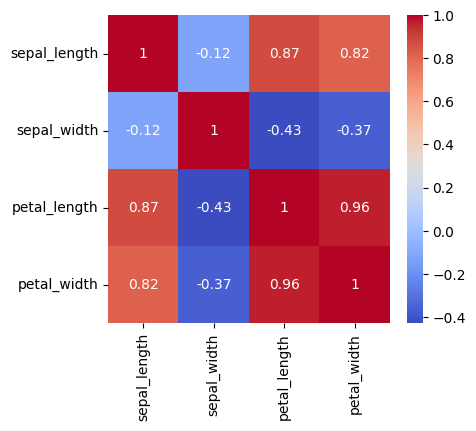

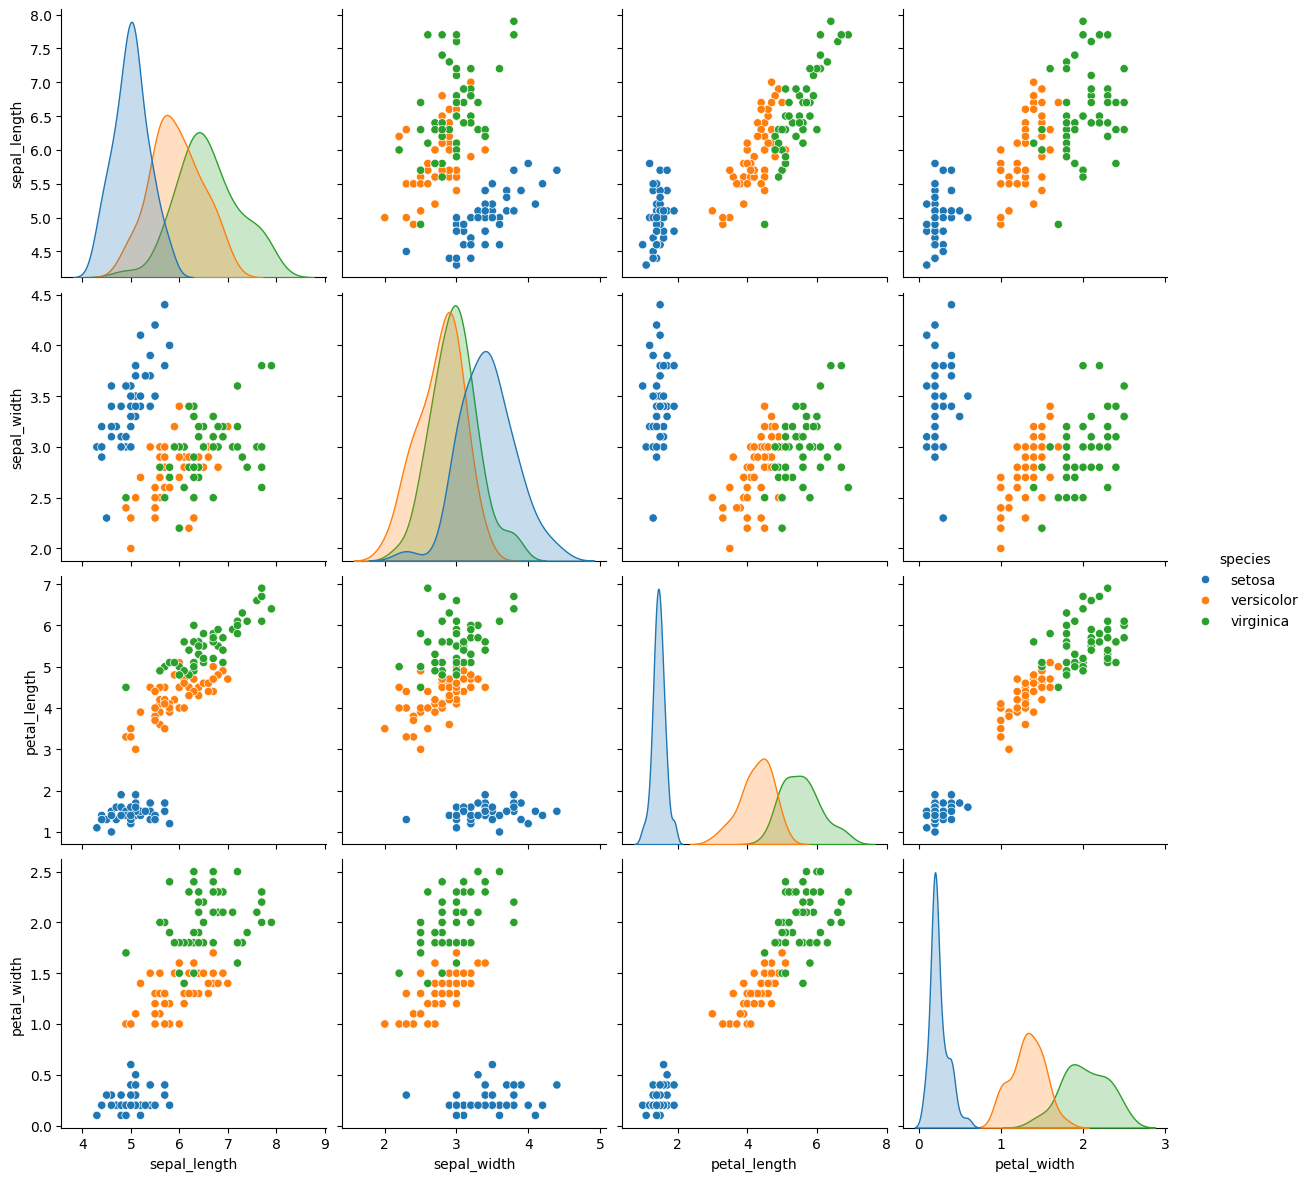

In [2]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# plot histogram for petal_length
plt.hist(df["petal_length"] , bins=25, color= "Green",edgecolor= "black", density=True)
plt.xlabel("Petal_length")
plt.title("Petal Length Distribution")

#boxplot by species
plt.subplot(1,2,2)
sns.boxplot(data = df, x= "species", y="sepal_length", orient ="v")
plt.title("Sepal Length By Spacies")
plt.tight_layout()
plt.savefig('../../images/iris_plots_2_3.png')
plt.show()

# PLOT Correlation Heatmap + Pairplot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(df.select_dtypes(include="number").corr(), cmap= "coolwarm", annot=True)
plt.title ="Feature correlation"
plt.savefig("../../images/iris_heatmap.png")

# plt.subplot(1,2,2)
sns.pairplot(df, hue="species",height=3,kind="scatter", diag_kind="kde")
plt.savefig("../../images/iris_full_analysis.png")

plt.show()




In [3]:
#numpy practice
import numpy as np
petal_data = df[["petal_length", "petal_width"]].values
print(f"Shape=, {petal_data.shape}")
print(f"Mean Petal Length: {petal_data[:,0].mean():.2f}")
print(f"Std Petal Width: {petal_data[:,1].std():.2f}")
correlation_matrix =np.corrcoef(petal_data.T)
print(f"Petal Correlation is : {correlation_matrix[0,1]:.2f}")

Shape=, (150, 2)
Mean Petal Length: 3.76
Std Petal Width: 0.76
Petal Correlation is : 0.96


In [8]:
#Iris Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature and lables
X= df.drop('species', axis =1)
Y = df['species']

x_train,x_test,y_train,y_test =train_test_split(X, Y, test_size= 0.2 , random_state=42, stratify =Y)
print("Train Shape: ", x_train.shape )
print("Test Shape: ", x_test.shape )


Train Shape:  (120, 4)
Test Shape:  (30, 4)


In [14]:
#Train Logistic Regression and Evaluate 

#Model Creation 
log_reg = LogisticRegression(max_iter = 200)

#Train Model
log_reg.fit(x_train, y_train) #for estimating the best weight so that the loss can be minimum

#predict for test data
y_predict = log_reg.predict(x_test)

#checck accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy of the model : {accuracy*100:.2f}%")

print(f"Classification Report:")
print(classification_report(y_test, y_predict))

Test Accuracy of the model : 96.67%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

